# APS AI e Robótica

In [85]:
from aigyminsper.search.SearchAlgorithms import BuscaLargura
from aigyminsper.search.SearchAlgorithms import BuscaProfundidade
from aigyminsper.search.SearchAlgorithms import BuscaProfundidadeIterativa
from aigyminsper.search.Graph import State
from datetime import datetime
import numpy as np

class SumOne(State):

    def __init__(self, n, op, g):
        self.operator = op
        self.number = n
        self.goal = g

    def sucessors(self):
        sucessors = []
        if self.number < self.goal:
            sucessors.append(SumOne(self.number+1, "+1 ", self.goal))
            sucessors.append(SumOne(self.number+2, "+2 ", self.goal))
        return sucessors

    def is_goal(self):
        if self.goal == self.number:
            return True
        return False

    def description(self):
        return "Este é um agente simples que sabe somar 1 e 2"

    def cost(self):
        return 1

    def env(self):
        return self.number

# Busaca em largura

In [104]:
# algoritimo para busca em largura
def calcula_iteracao_busca_em_largura(i):

    # objetivo = int(input('Digite o valor objetivo: '))
    objetivo = i
    state = SumOne(1, '', objetivo)
    algorithm = BuscaLargura()

    start_time = datetime.now()
    result = algorithm.search(state)
    end_time = datetime.now()

    delta_t = end_time - start_time

    if result != None:

        return delta_t

valores_busca_largura = np.array([])

for i in range(1, 51):
    valores_busca_largura = np.append(valores_busca_largura, calcula_iteracao_busca_em_largura(i).microseconds )


## Plot resultados busca em largura

Text(0.5, 0, 'Objetivo')

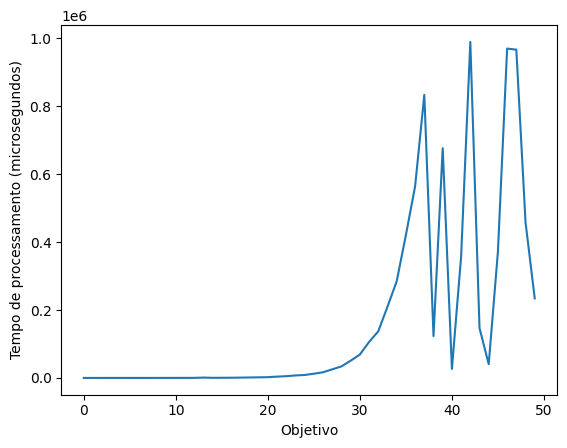

In [105]:
import matplotlib.pyplot as plt
plt.plot(valores_busca_largura)
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')


In [88]:
with open('results.txt', 'w') as f:
    f.write(str(valores_busca_largura))
        

In [89]:
# algoritimo para busca em profundidade
def calcula_iteracao_busca_em_profundidade(i):

    # objetivo = int(input('Digite o valor objetivo: '))
    objetivo = i
    state = SumOne(1, '', objetivo)
    algorithm = BuscaProfundidade()

    start_time = datetime.now()
    result = algorithm.search(state, m=100)
    end_time = datetime.now()

    delta_t = end_time - start_time

    if result != None:
        return delta_t

valores_busca_profundidade = np.array([])

for i in range(1, 51):
    valores_busca_profundidade = np.append(valores_busca_profundidade, calcula_iteracao_busca_em_profundidade(i).microseconds )

## Plot resultados busca em profundidade

Text(0.5, 0, 'Objetivo')

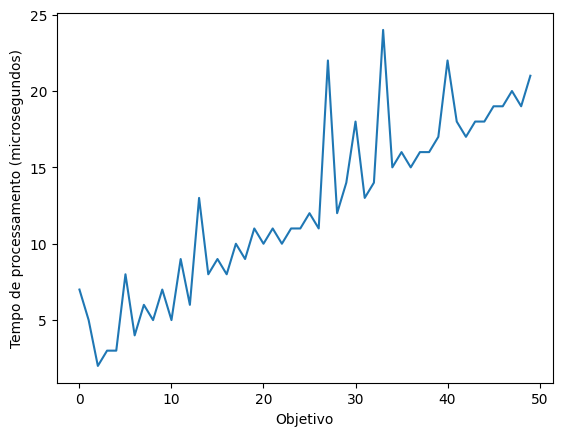

In [90]:
plt.plot(valores_busca_profundidade)
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')

# Busca em profundidade

In [91]:
# algoritimo para busca em profundidade
def calcula_iteracao_busca_em_profundidade_iterativa(i):

    # objetivo = int(input('Digite o valor objetivo: '))
    objetivo = i
    state = SumOne(1, '', objetivo)
    algorithm = BuscaProfundidadeIterativa()

    start_time = datetime.now()
    result = algorithm.search(state)
    end_time = datetime.now()

    delta_t = end_time - start_time

    if result != None:
        return delta_t

valores_busca_profundidade_iterativa = np.array([])

for i in range(1, 51):
    valores_busca_profundidade_iterativa = np.append(valores_busca_profundidade_iterativa, calcula_iteracao_busca_em_profundidade_iterativa(i).microseconds )

## Plot resultados busca em profundiade iterativa

Text(0.5, 0, 'Objetivo')

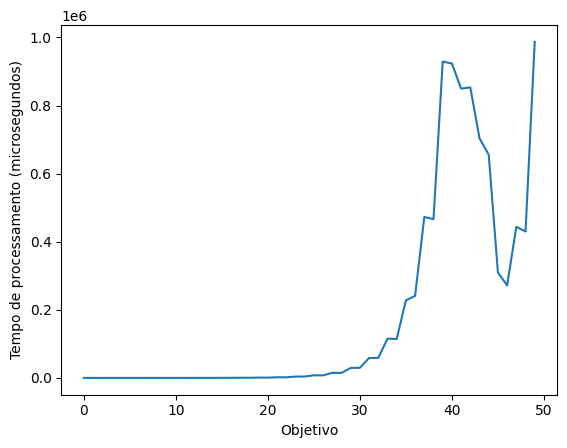

In [92]:
plt.plot(valores_busca_profundidade_iterativa)
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')

# Plot de todos os resultados

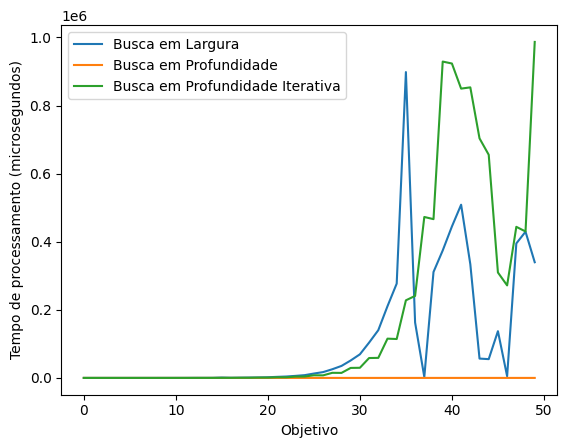

In [93]:
plt.plot(valores_busca_largura, label='Busca em Largura')
plt.plot(valores_busca_profundidade, label='Busca em Profundidade m=100')
plt.plot(valores_busca_profundidade_iterativa, label='Busca em Profundidade Iterativa')
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')
plt.legend()


## Tabela com os resultados

In [94]:
import pandas as pd

df = pd.DataFrame({'Busca em Largura': valores_busca_largura, 'Busca em Profundidade': valores_busca_profundidade, 'Busca em Profundidade Iterativa': valores_busca_profundidade_iterativa})
df['Objetivo'] = df.index + 1
print(df.to_string(index=False))

 Busca em Largura  Busca em Profundidade  Busca em Profundidade Iterativa  Objetivo
              5.0                    7.0                             11.0         1
              5.0                    5.0                              5.0         2
              4.0                    2.0                              2.0         3
              6.0                    3.0                              5.0         4
              8.0                    3.0                              5.0         5
             10.0                    8.0                              9.0         6
             18.0                    4.0                              8.0         7
             22.0                    6.0                             18.0         8
             28.0                    5.0                             17.0         9
             38.0                    7.0                             32.0        10
             51.0                    5.0                             32.0   